# SEER Breast Cancer Analysis

In this notebook, we will conduct several analyses using the data in the SEER breast cancer data set.  You will practice fitting distributions and conducting hypothesis tests.

As before, we will stratify our data to mimic the analysis in "Breast Cancer Stage Variation and Survival in Association With Insurance Status and Sociodemographic Factors in US Women 18 to 64 Years Old" by Hsu, et. al (2017). [Link to Full Paper.](http://rdcu.be/Gdvp/)

The code here is provided for your convenience, but you are not required to use it.  

In [39]:
import pandas as pd
from os import path
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import triang
%matplotlib inline 

# Load data into dataframe
We've moved all the data-loading into a python script read_seer_data.py to make this notebook a little less congested.

In [40]:
# This is loading the synthetic data
import pickle
table,records = pickle.load(open("seer_synthetic.p", "rb"))

# look at the top 5 rows of the dataframe
table.head(5)

,Patient ID number,Sex,Survival months,Age Group,Marital Group,"Race recode (W,B,AI,API)",Insurance recode,Hormone Receptor,Cancer Stage Num,Early Late Stage
0,0,2,78,2,2,1,3,1.0,1.0,1.0
0,1,2,88,1,2,1,3,1.0,2.0,1.0
0,2,2,60,2,2,1,4,1.0,1.0,1.0
0,3,2,86,2,1,2,3,2.0,1.0,1.0
0,4,2,56,1,2,1,3,2.0,4.0,2.0


## Visualize the Data

Here we will see how breast cancer survival is distributed across different stages at cancer diagnosis.

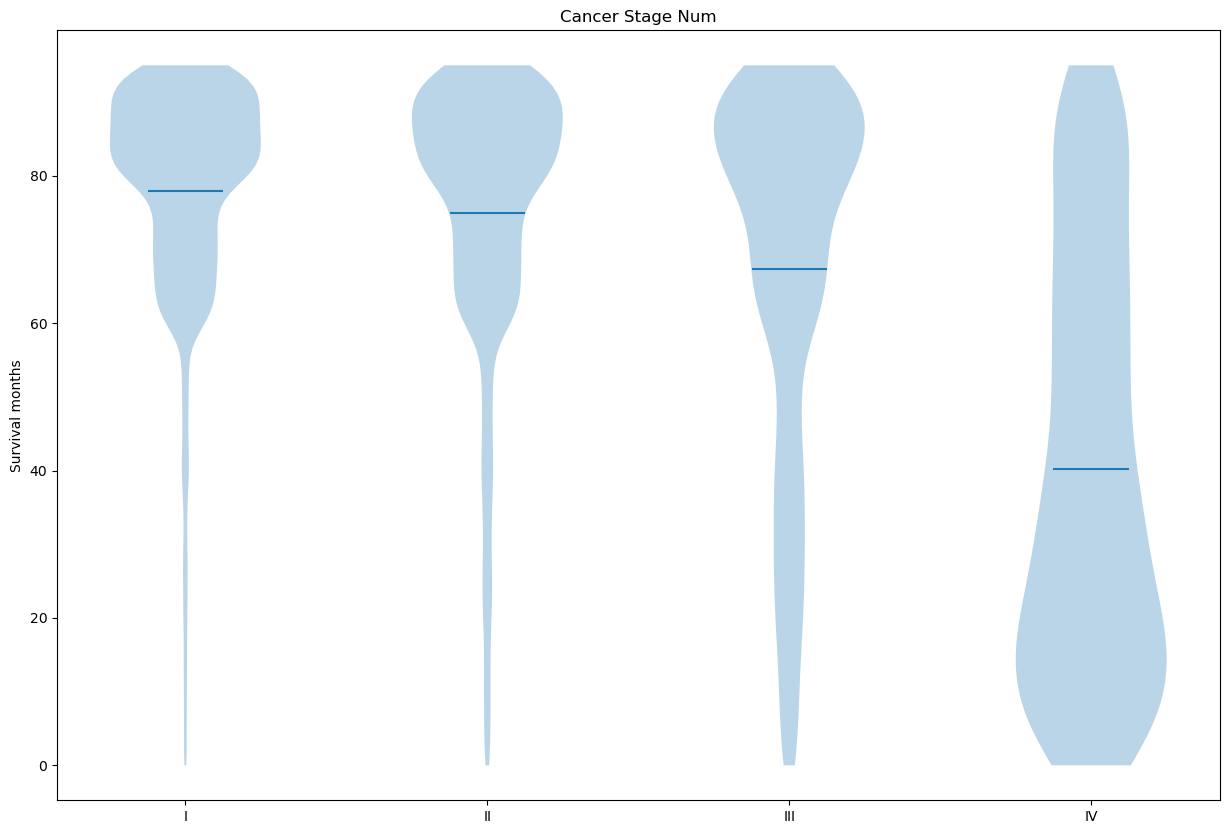

In [41]:
factor = 'Cancer Stage Num'
response = 'Survival months'

# identify the covariate strata within the data
vals = np.unique(table[factor].values)
    
# group the data by strata
table_subset = [list(table[table[factor] == x][response].values) for x in vals]

# plot approximate distributions using violinplot
plt.figure(figsize=(15, 10))
ax = plt.subplot(111)
plt.violinplot(table_subset, positions=range(len(vals)),showmeans=True,showextrema=False)

xlabels=[records[factor]['codes'][v] for v in vals]
ax.set_xticks(range(len(vals)))
ax.set_xticklabels(xlabels)
ax.set_ylabel(response)
ax.set_title(factor)
plt.show()

# Distribution Fitting
Use [SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html) to fit the data to continuous distributions

## Distribution A
Fit Stage I breast cancer survival to a [normal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) distribution

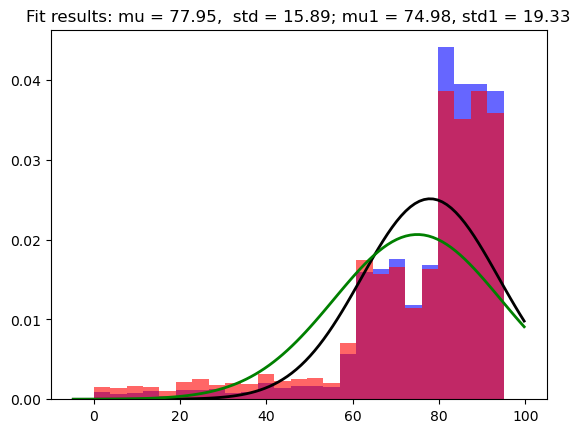

In [52]:
# STUDENT CODE GOES HERE 


# Fit a normal distribution to the data:
mu, std = norm.fit(table_subset[0])
mu1, std1 = norm.fit(table_subset[1])

# Plot the histogram.
plt.hist(table_subset[0], bins=25, density=True, alpha=0.6, color='b')
plt.hist(table_subset[1], bins=25, density = True, alpha = 0.6, color = 'r')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
p1 = norm.pdf(x, mu1, std1)
plt.plot(x, p, 'k', linewidth=2)
plt.plot(x, p1, 'g', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f; mu1 = %.2f, std1 = %.2f" % (mu, std, mu1, std1)
plt.title(title)

plt.show()

## Distribution B
Fit Stage II breast cancer survival to a [triangle](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html) distribution

(100,)
(100,)


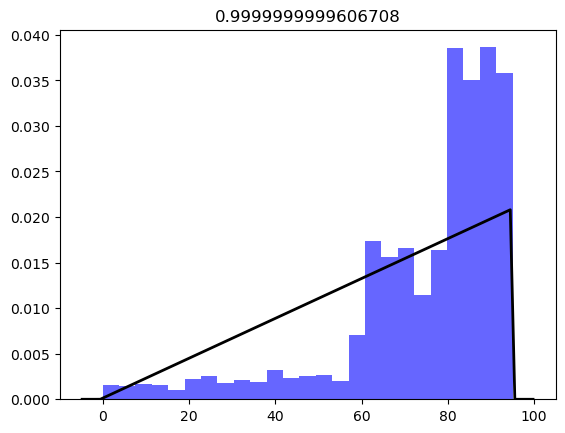

In [34]:
# STUDENT CODE GOES HERE 


# Fit a normal distribution to the data:
c, loc, scale = triang.fit(table_subset[1])
# Plot the histogram.
plt.hist(table_subset[1], bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
print(x.shape)
p = triang.pdf(x, c, loc, scale)
print(p.shape) 
plt.plot(x, p, 'k', linewidth=2)
# title = "Fit results: x = %.2f,  c = %.2f" % (x, c)
# plt.title(title)
plt.title(c)
plt.show()


## Distribution C
Fit Stage IV breast cancer survival to a [beta](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html) distribution

0.852818438754477 1.307133339924857 -5.2819187862141604e-21 96.069263483456
(100,)
(100,)


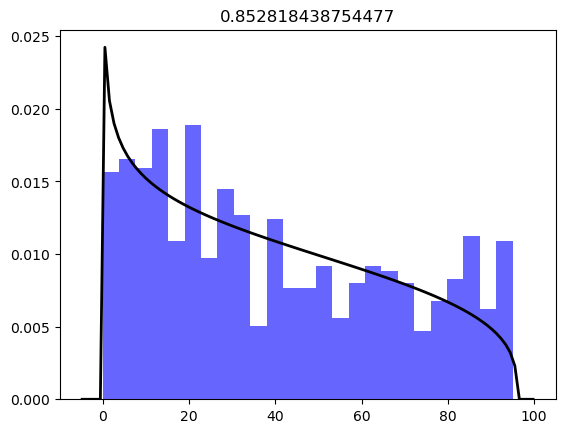

In [35]:
from scipy.stats import beta

# Fit a normal distribution to the data:
a, b, loc, scale = beta.fit(table_subset[3])
print(a,b,loc,scale)
# Plot the histogram.
plt.hist(table_subset[3], bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
print(x.shape)
p = beta.pdf(x, a, b, loc, scale)
print(p.shape)
plt.plot(x, p, 'k', linewidth=2)
# title = "Fit results: x = %.2f,  c = %.2f" % (x, c)
# plt.title(title)
plt.title(a)
plt.show()

# -------------------------------------------------------------

# Hypothesis Testing
Use [SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-functions) to test for different hypotheses.  

Note that the Student's t-test and F-test assume normality of the data (which ours is not).  These would not be appropriate hypothesis tests to use for this data, but for the purpose of practice, don't worry about it for now.

## Hypothesis A

* $H_1=$ Survival for patients diagnosed with Stage I and Stage II have different expected values (means)
* $H_0=$ The means are the same for Stage I and Stage II 
* (Use a [Student's t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html))


In [48]:
# STUDENT CODE GOES HERE 

tvalue, pvalue = stats.ttest_ind(table_subset[0],table_subset[1])
print(tvalue,pvalue)

10.8175232828007 3.509777508535309e-27


## Hypothesis B

*  $H_1=$ Survival for patients diagnosed with Stage I and Stage II have different variances
*  $H_0=$ The variances are the same for Stage I and Stage II
*  (Use an [F-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html))




In [43]:
fstat, pval = stats.f_oneway(table_subset[0],table_subset[1])
print(fstat,pval)

117.01880997393475 3.509777508561338e-27


## Hypothesis C

*  $H_1=$ The distributions of survival for patients diagnosed with Stage I and Stage II are different
*  $H_0=$ The distributions are the same
*  (Use a two-sided [Kolmogorov-Smirnov Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html))


In [50]:
kstat, pvalue= stats.ks_2samp(table_subset[0], table_subset[1])
print(kstat, pvalue)

0.06095713556849624 1.694200335577989e-13


## Hypothesis D

*  $H_1=$ The distributions of survival for patients diagnosed with Stage II and Stage III are different
*  $H_0=$ The distributions are the same
*  (Use a two-sided [Kolmogorov-Smirnov Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html))


In [51]:
kstat, pvalue= stats.ks_2samp(table_subset[1], table_subset[2])
print(kstat, pvalue)


0.14228258370542468 3.7872363810647326e-34
